In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
from getpass import getpass
import mariadb
import psycopg2

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [8]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

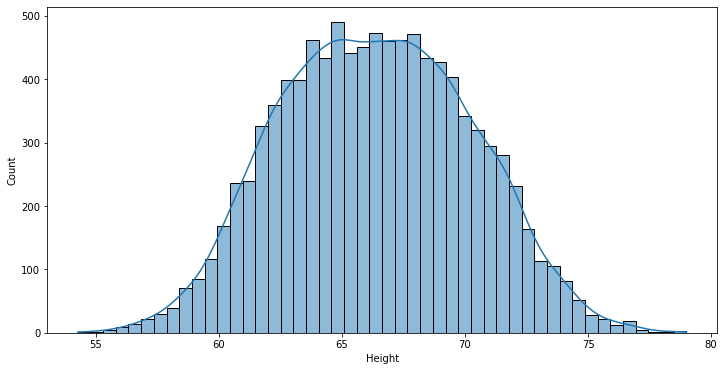

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(df.Height, kde=True)
plt.show

In [16]:
mean=df.Height.mean()
mean

66.36755975482106

In [18]:
std_deviation = df.Height.std()
std_deviation

3.8475281207732324

In [19]:
mean- 3*std_deviation 


54.82497539250136

In [20]:
mean+ 3*std_deviation 

77.91014411714076

In [21]:
#anaything outside the - and + mean value is an outlyer

df[df.Height< 54.82]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [22]:
df[df.Height> 77.91]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [23]:
df [(df.Height> 77.91) | (df.Height<54.82)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [24]:
#removing outlyer
df_no_outlier= df [(df.Height< 77.91) & (df.Height>54.82)]
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<function matplotlib.pyplot.show(close=None, block=None)>

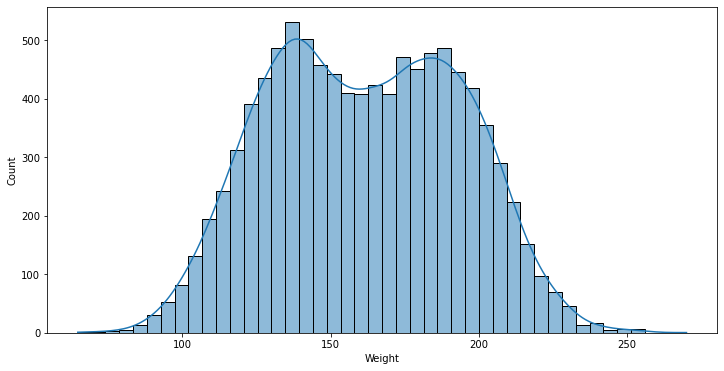

In [25]:
#WEIGHT
plt.figure(figsize=(12,6))
sns.histplot(df.Weight, kde=True)
plt.show

In [26]:
mean=df.Weight.mean()
mean

161.44035683283076

In [32]:
std_deviate = df.Weight.std()
std_deviate

32.108439006519546

In [33]:
mean- 3*std_deviate

65.11503981327212

In [34]:
mean+ 3*std_deviate

257.7656738523894

In [39]:
#CHECKING FOR OUTLIERS
df [(df.Weight> 257.76) | (df.Weight<65.11)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


In [40]:
#removing outlyer
df_no_outlie= df [(df.Weight< 257.76) & (df.Weight>65.11)]
df_no_outlie

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [59]:
conn = psycopg2.connect('dbname= elvis user=postgres host=localhost password=stipulated')

In [60]:
conn

<connection object at 0x0000017D2C5397B0; dsn: 'user=postgres password=xxx dbname=elvis host=localhost', closed: 0>

In [61]:
# create  a cursor object
cur=conn.cursor()

In [62]:
cur

<cursor object at 0x0000017D2C86D200; closed: 0>

In [63]:
cur.execute('SELECT * FROM person')

In [65]:
cur.fetchall()

[('9278fba4-609d-4961-94b1-538376a7880c',
  'Teju',
  'Lekan',
  'lekanteju@gmail.com',
  datetime.date(1990, 1, 9),
  'Nigeria',
  '9857aa4a-6927-4285-82d7-45037dd053e7'),
 ('4506d922-07f0-455e-a470-884b3334469a',
  'Ben',
  'Fred',
  'benfred@yahoo.com',
  datetime.date(1997, 3, 1),
  'Niger',
  '3e8388a0-ec03-49fc-94f7-8bce1fdeb8e5'),
 ('f3ef8a00-4ceb-477f-aa31-388cbea1073b',
  'Ladi',
  'Magu',
  None,
  datetime.date(1999, 6, 7),
  'Nigeria',
  'd46bf2bb-3f9c-42e3-99d1-bf805c0907af')]